In [1]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from numpy import fft
from time import time

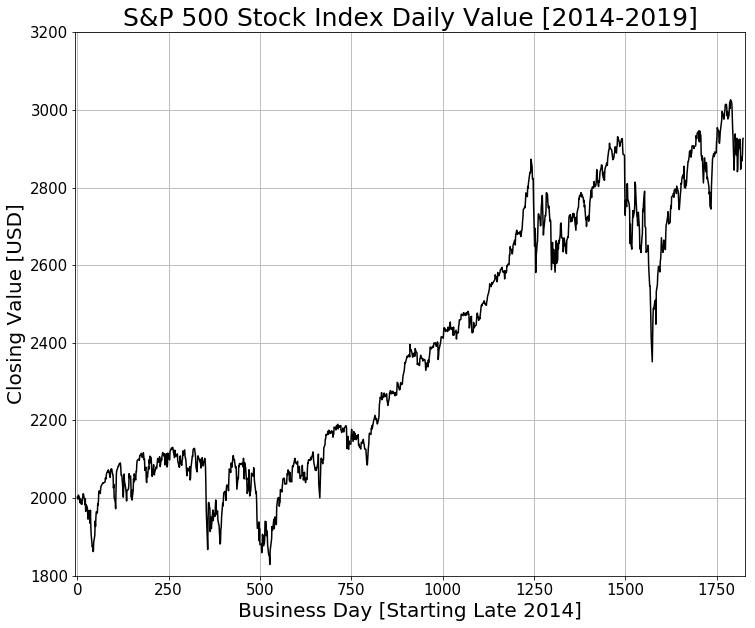

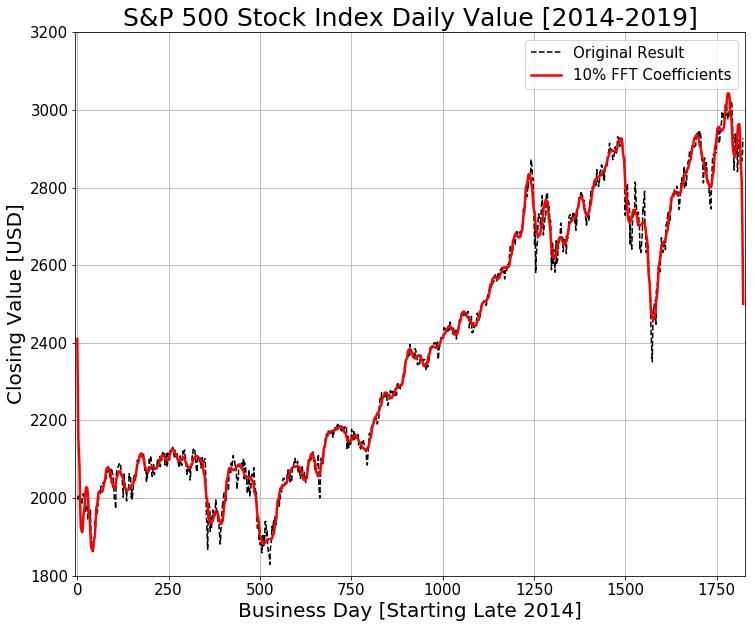

Low-pass frequency cut off index: 9



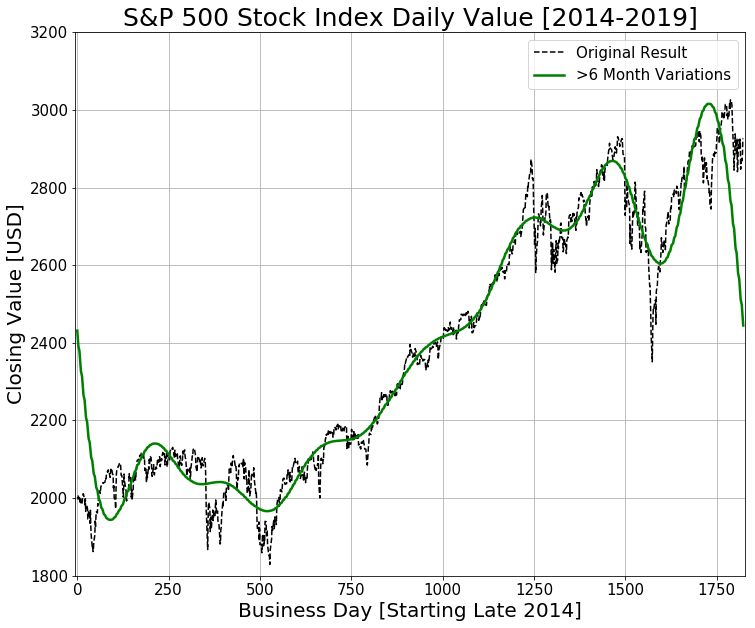

High-pass frequency cut off index: 259



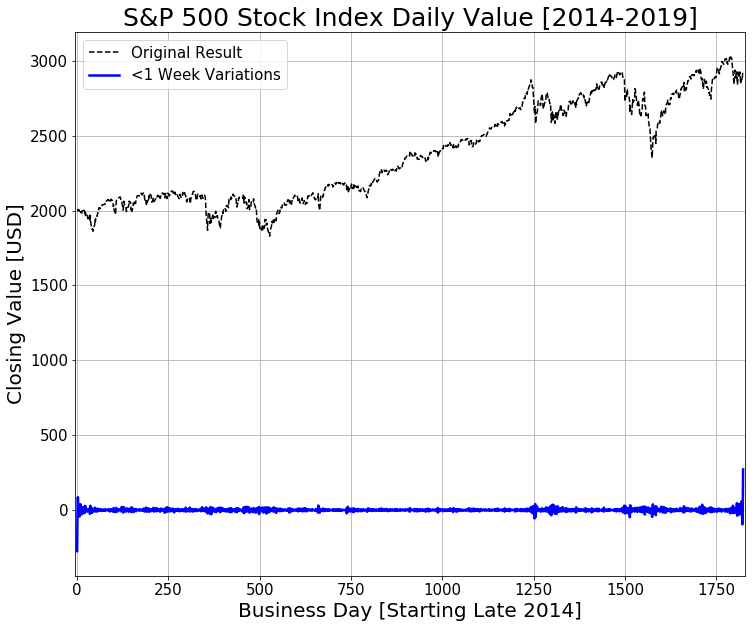

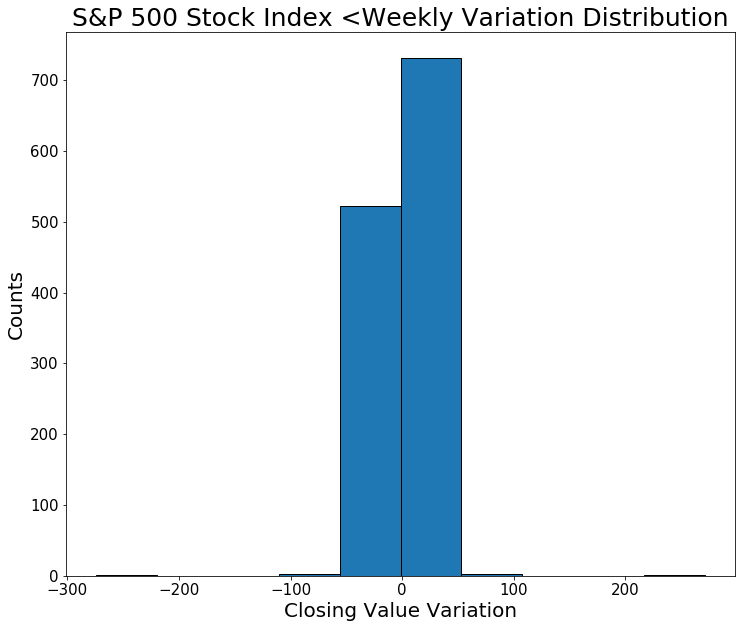

In [2]:
#PROBLEM 1

#PART A
#Loading csv data for sp500 daily closing values
day, close = genfromtxt('sp500c.csv', delimiter=',', skip_header=1, unpack=True)

#Plotting the csv data (We plot in terms of business days to clearly show the discrepancy of weekend values)
plt.figure(figsize=(12,10))
plt.title('S&P 500 Stock Index Daily Value [2014-2019]', fontsize=25)
plt.xlabel('Business Day [Starting Late 2014]', fontsize=20)
plt.ylabel('Closing Value [USD]', fontsize=20)
plt.plot(day, close, 'k-')
plt.xlim(-5,1828)
plt.ylim(1800,3200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab5_q1_plot1.pdf', bbox_inches='tight')
plt.show()

#PART B
#Computing the rfft coefficients
close_rfft = fft.rfft(close)

#Checking if irfft returns the original data
close_irfft = fft.irfft(close_rfft, len(close))

#Loop to print the results of the above check with irfft
for i in range(len(close)):
    if np.abs(close_irfft[i] - close[i]) > 1e-9: #Check if the irfft is close to the original results
        print('Check Failed')
        break #If check fails, print above and break the loop
        
#PART C
#Copying the original rfft to a new variable
close_rfft_10per = np.copy(close_rfft)

#Setting all coefficients except the first 10% to 0
for i in range(63,630):
    close_rfft_10per[i] = 0

#Inversing the new 10% coefficient array
close_irfft_10per = fft.irfft(close_rfft_10per, len(close))

#Plotting the results with the original
plt.figure(figsize=(12,10))
plt.title('S&P 500 Stock Index Daily Value [2014-2019]', fontsize=25)
plt.xlabel('Business Day [Starting Late 2014]', fontsize=20)
plt.ylabel('Closing Value [USD]', fontsize=20)
plt.plot(day, close, 'k--', linewidth=1.5, label='Original Result')
plt.plot(day, close_irfft_10per, 'r-', linewidth=2.5, label='10% FFT Coefficients')
plt.xlim(-5,1828)
plt.ylim(1800,3200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('lab5_q1_plot2.pdf', bbox_inches='tight')
plt.show()

#PART D
#Copying the original rfft to a new variable
close_rfft_6mo = np.copy(close_rfft)

#Defining a frequency range with rfftfreq module
freq = np.fft.rfftfreq(1260)

#Finding the frequency index corresponding to 6 months
print('Low-pass frequency cut off index:', np.where(freq<2/253)[0][-1])
print()

#Applying a low-pass filer at this frequency index
for i in range(np.where(freq<2/253)[0][-1],630):
    close_rfft_6mo[i] = 0

#Inversing the new >6 month variation array
close_irfft_6mo = fft.irfft(close_rfft_6mo, len(close))

#Plotting the results with the original
plt.figure(figsize=(12,10))
plt.title('S&P 500 Stock Index Daily Value [2014-2019]', fontsize=25)
plt.xlabel('Business Day [Starting Late 2014]', fontsize=20)
plt.ylabel('Closing Value [USD]', fontsize=20)
plt.plot(day, close, 'k--', linewidth=1.5, label='Original Result')
plt.plot(day, close_irfft_6mo, 'g-', linewidth=2.5, label='>6 Month Variations')
plt.xlim(-5,1828)
plt.ylim(1800,3200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('lab5_q1_plot3.pdf', bbox_inches='tight')
plt.show()

#PART E
#Copying the original rfft to a new variable
close_rfft_1wk = np.copy(close_rfft)

#Finding the frequency index corresponding to 1 week
print('High-pass frequency cut off index:', np.where(freq>52/253)[0][0])
print()

#Applying a high-pass filer at this frequency index
for i in range(0,np.where(freq>52/253)[0][0]):
    close_rfft_1wk[i] = 0

#Inversing the new <1 week variation array
close_irfft_1wk = fft.irfft(close_rfft_1wk, len(close))

#Plotting the results with the original
plt.figure(figsize=(12,10))
plt.title('S&P 500 Stock Index Daily Value [2014-2019]', fontsize=25)
plt.xlabel('Business Day [Starting Late 2014]', fontsize=20)
plt.ylabel('Closing Value [USD]', fontsize=20)
plt.plot(day, close, 'k--', linewidth=1.5, label='Original Result')
plt.plot(day, close_irfft_1wk, 'b-', linewidth=2.5, label='<1 Week Variations')
plt.xlim(-5,1828)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('lab5_q1_plot4.pdf', bbox_inches='tight')
plt.show()

#Plotting histogram of <1 week variation data
plt.figure(figsize=(12,10))
plt.title('S&P 500 Stock Index <Weekly Variation Distribution', fontsize=25)
plt.xlabel('Closing Value Variation', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.hist(close_irfft_1wk, edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lab5_q1_plot5.pdf', bbox_inches='tight')
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


Testing the FFT Analysis function with cos(x):
Expected amplitude, phase and period: 1.0, 0.0, 1.0
Computed amplitude, phase and period: 1.0000000000001719 0.0 1.0



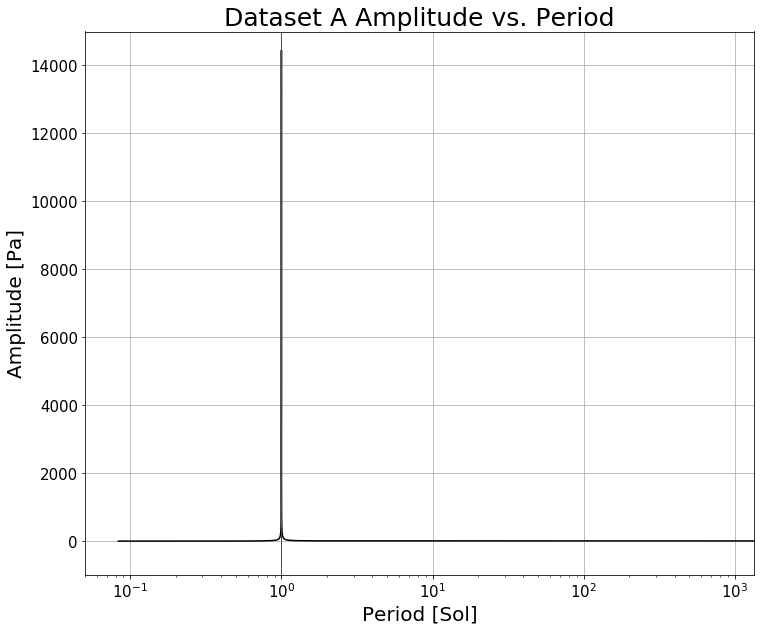

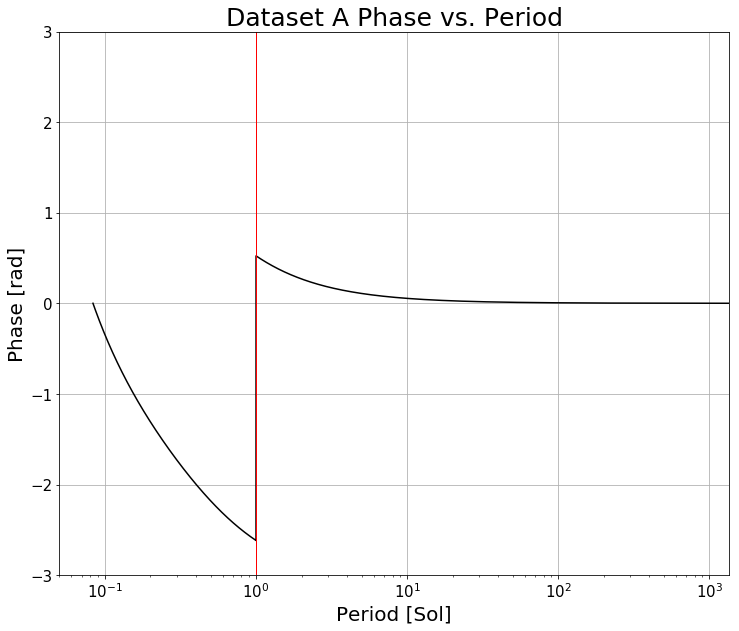

Dominant wave amplitude and phase: 320945.0049833851 0.5235070720248045



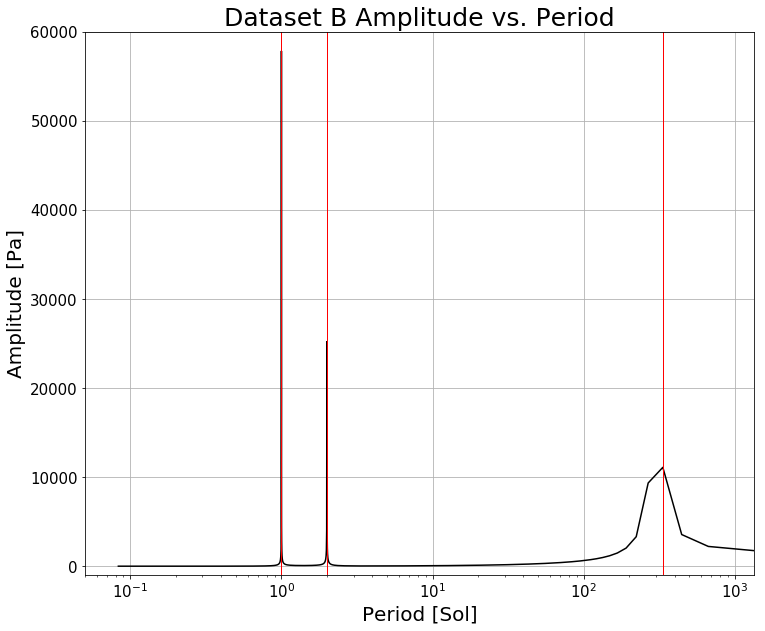

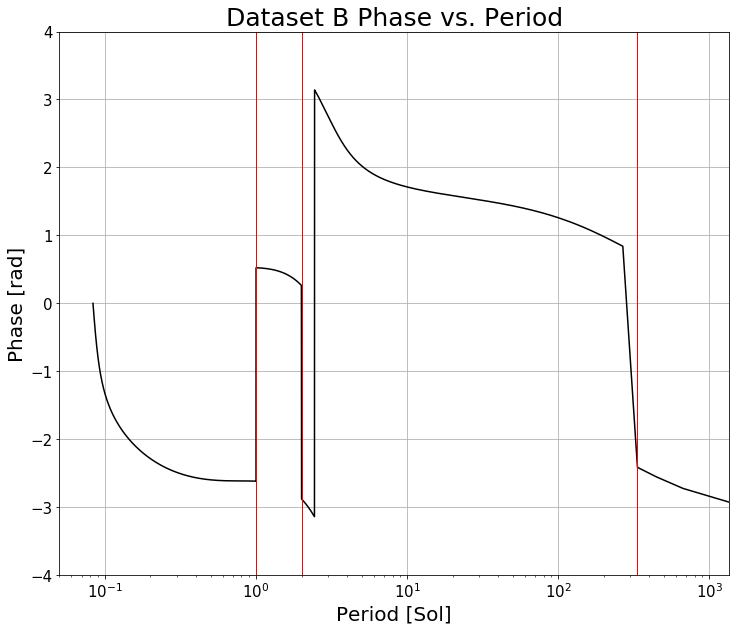

The amplitudes of the waves that correspond to the peaks are  15078.303470381388 11573.7696644556 11092.100909228568 .
The phase of the waves that correspond to the peaks are  -2.8807406832968447 0.5235576843198742 -2.4142071518308903 .
The period of the waves that correspond to the peaks are  2.0018712573685056 1.0009356286842528 334.31249998054045 .



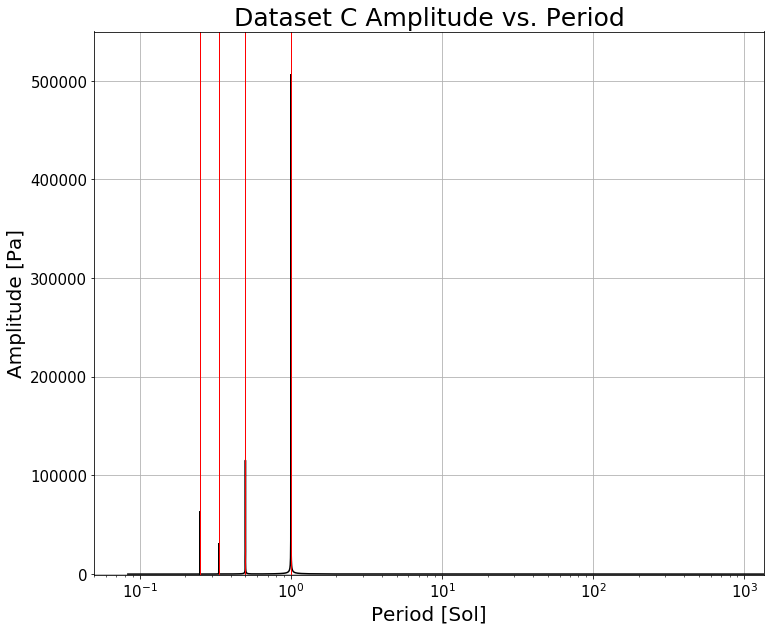

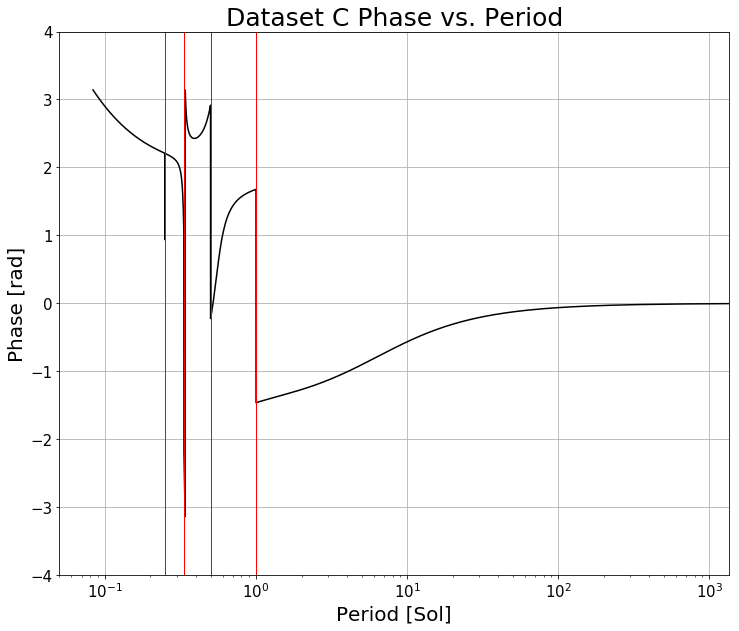

The amplitudes of the waves that correspond to the peaks are  101221.62377177602 115447.67016851483 30906.589880369138 63302.21485776078 .
The phase of the waves that correspond to the peaks are  -1.4634499039716757 2.915900906388932 0.9616063685780326 0.9352007680700125 .
The period of the waves that correspond to the peaks are  1.0009356286842528 0.4999065420269764 0.3333125622936595 0.24999999998544808 .



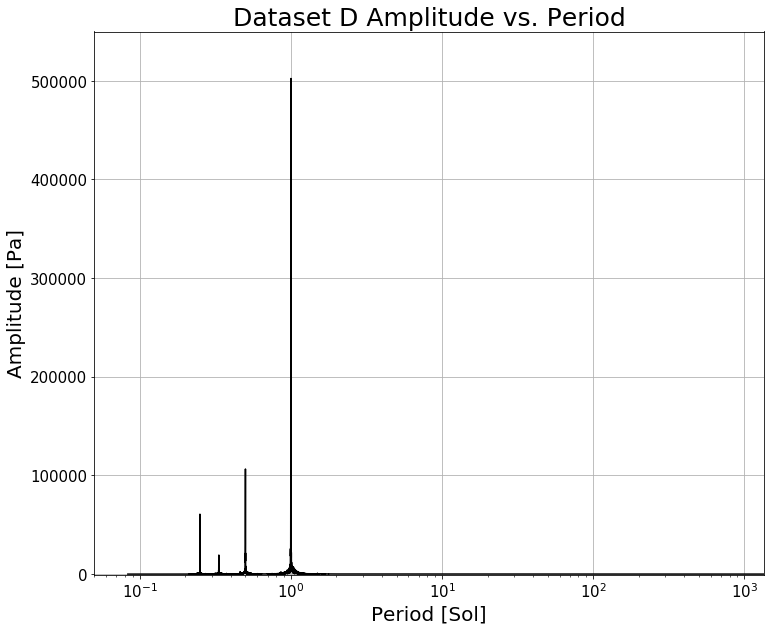

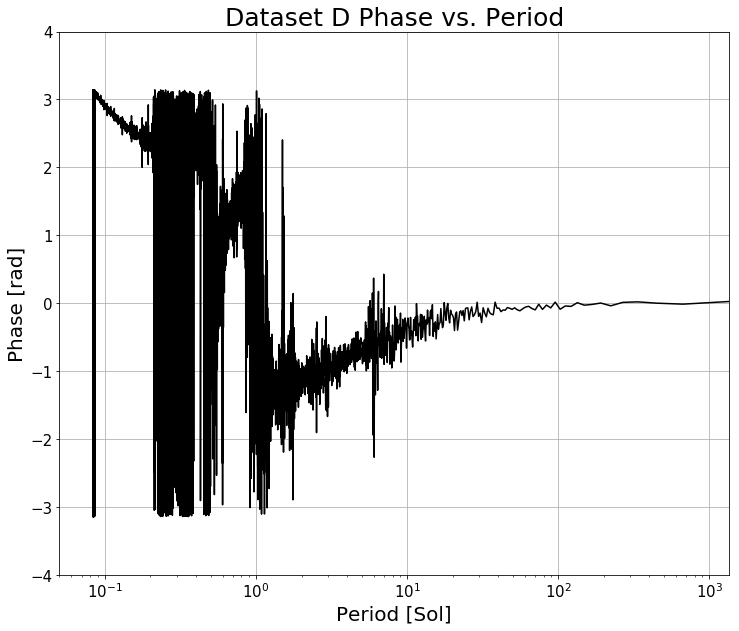

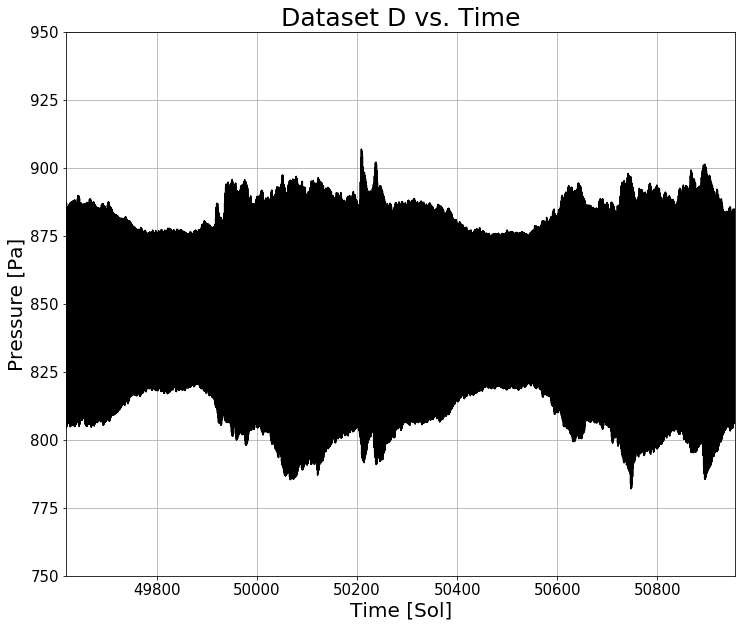

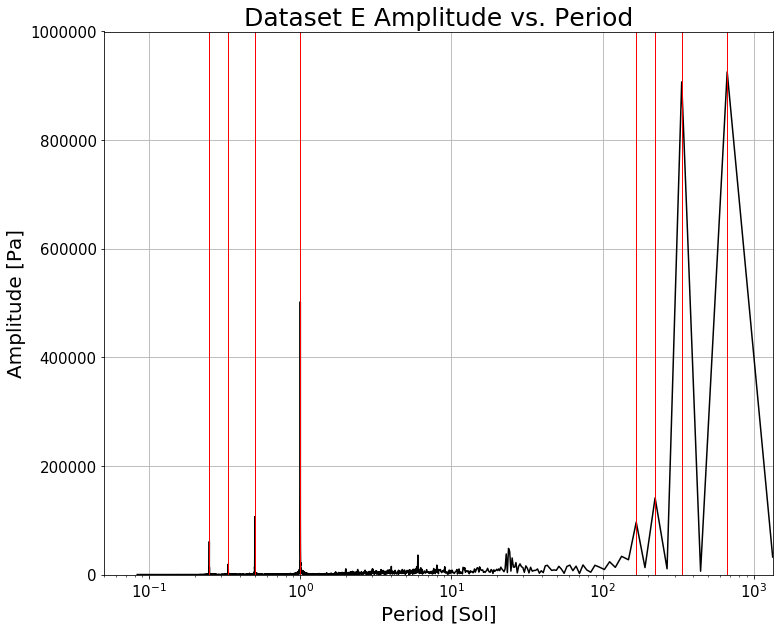

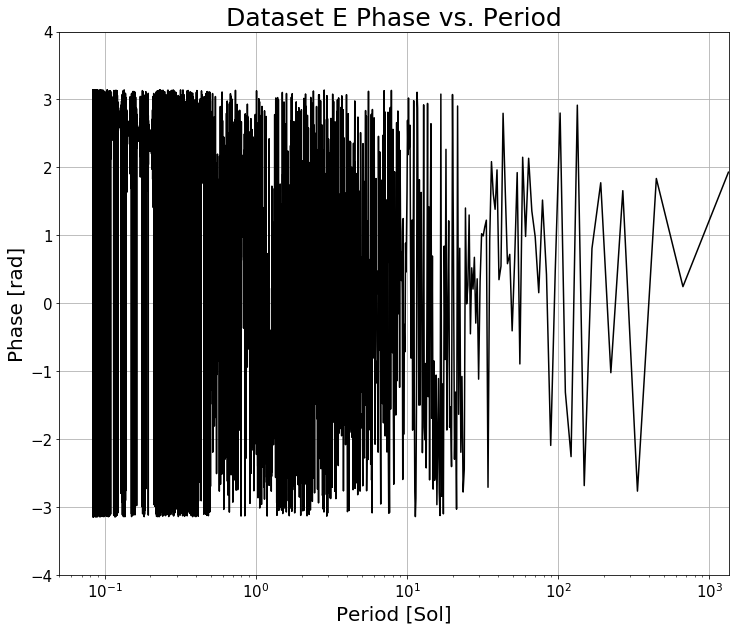

Amplitudes for 4 largest waves with periods greater than 100 sols:  [502405.69196481 106533.96948574  12056.78261329  60742.21562626]
Periods for 4 largest waves with periods greater than 100 sols:  [1.00018699 0.50009349 0.33331256 0.25      ]
Local times of peaks for 4 largest waves with periods greater than 100 sols:  [49674.16666664 49729.87499997 49785.62499997 49841.3333333 ]

Amplitudes for 4 largest waves with periods less than 1 sol:  [925618.57057956 907253.38533487 141262.1379997   96536.99437678]
Periods for 4 largest waves with periods less than 1 sol:  [668.62499996 334.31249998 222.87499999 167.15624999]
Local times of peaks for 4 largest waves with periods less than 1 sol:  [49618.54166665 49618.62499998 49618.70833331 49618.79166665]



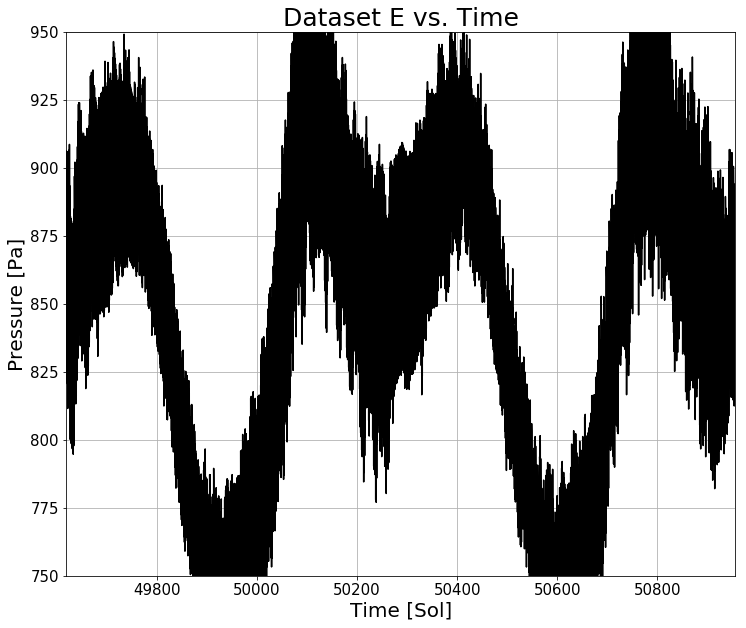

In [30]:
#PROBLEM 2

#PART A
#Loading csv data from the msl_rems data set
time, ls, A, B, C, D, E = genfromtxt('msl_rems.csv', delimiter=',', skip_header=1, unpack=True)

#Defining an analysis function to return amplitude, phase and period for a data set
def fft_analysis(data, timestep):
    data_fft = fft.rfft(data)          #Take the fft of the data
    n = data.size                      #Size of the data
    freq = fft.rfftfreq(n, d=timestep) #Freq range of the data
    period = 1/freq                    #Finding period from freq range
    amplitude = np.abs(data_fft)       #Amplitude from the fft
    phase = np.angle(data_fft)         #Phase from the fft
    return amplitude, phase, period

#Testing on a well known data set - cos(x)
t_test = np.linspace(0, 10*np.pi, 10000) #Linspace between 0 and 10pi
x_test = np.cos(t_test)                  #Cosine function on the above linspace
amp_test, phase_test, period_test = fft_analysis(x_test, 1/10000)

#Test should return amp = 1, phase = 0, period = 1
print('Testing the FFT Analysis function with cos(x):')
print('Expected amplitude, phase and period: 1.0, 0.0, 1.0')
print('Computed amplitude, phase and period:', amp_test[0], phase_test[0], period_test[1])
print()

#PART B
#Applying the fourier analysis on data set A
amp_A, phase_A, period_A = fft_analysis(A, time[1]-time[0])

#Plotting amplitude as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset A Amplitude vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Amplitude [Pa]', fontsize=20)
plt.plot(period_A, amp_A, 'k-')
plt.axvline(period_A[1336], color='r', lw=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-1000, 15000)
plt.grid()
plt.savefig('lab5_q2_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting phase as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset A Phase vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Phase [rad]', fontsize=20)
plt.plot(period_A, phase_A, 'k-')
plt.axvline(period_A[1336], color='r', lw=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-3, 3)
plt.grid()
plt.savefig('lab5_q2_plot2.pdf', bbox_inches='tight')
plt.show()

#Printing amplitude and phase of dominant wave
print('Dominant wave amplitude and phase:', np.nanmax(amp_A), np.nanmax(phase_A))
print()

#PART C
#Applying the fourier analysis on data set B
amp_B, phase_B, period_B = fft_analysis(B, time[1]-time[0])

#Plotting amplitude as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset B Amplitude vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Amplitude [Pa]', fontsize=20)
plt.plot(period_B, amp_B, 'k-')
plt.axvline(period_B[668], color='r', lw=1)
plt.axvline(period_B[1336], color='r', lw=1)
plt.axvline(period_B[4], color='r', lw=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-1000, 60000)
plt.grid()
plt.savefig('lab5_q2_plot3.pdf', bbox_inches='tight')
plt.show()

#Plotting phase as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset B Phase vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Phase [rad]', fontsize=20)
plt.plot(period_B, phase_B, 'k-')
plt.axvline(period_B[668], color='r', lw=1)
plt.axvline(period_B[1336], color='r', lw=1)
plt.axvline(period_B[4], color='r', lw=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-4, 4)
plt.grid()
plt.savefig('lab5_q2_plot4.pdf', bbox_inches='tight')
plt.show()
print('The amplitudes of the waves that correspond to the peaks are ', amp_B[668], amp_B[1336], amp_B[4], ".")
print('The phase of the waves that correspond to the peaks are ', phase_B[668], phase_B[1336], phase_B[4], ".")
print('The period of the waves that correspond to the peaks are ', period_B[668], period_B[1336], period_B[4], ".")
print()

#PART D
#Applying the fourier analysis on data set C
amp_C, phase_C, period_C = fft_analysis(C, time[1]-time[0])

#Plotting amplitude as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset C Amplitude vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Amplitude [Pa]', fontsize=20)
plt.plot(period_C, amp_C, 'k-')
plt.axvline(period_C[1336], color='r', lw=1)
plt.axvline(period_C[2675], color='r', lw=1)
plt.axvline(period_C[4012], color='r', lw=1)
plt.axvline(period_C[5349], color='r', lw=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-1000, 550000)
plt.grid()
plt.savefig('lab5_q2_plot5.pdf', bbox_inches='tight')
plt.show()

#Plotting phase as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset C Phase vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Phase [rad]', fontsize=20)
plt.plot(period_C, phase_C, 'k-')
plt.axvline(period_C[1336], color='r', lw=1)
plt.axvline(period_C[2675], color='r', lw=1)
plt.axvline(period_C[4012], color='r', lw=1)
plt.axvline(period_C[5349], color='r', lw=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-4, 4)
plt.grid()
plt.savefig('lab5_q2_plot6.pdf', bbox_inches='tight')
plt.show()
print('The amplitudes of the waves that correspond to the peaks are ', amp_C[1336], amp_C[2675], amp_C[4012], amp_C[5349], ".")
print('The phase of the waves that correspond to the peaks are ', phase_C[1336], phase_C[2675], phase_C[4012], phase_C[5349], ".")
print('The period of the waves that correspond to the peaks are ', period_C[1336], period_C[2675], period_C[4012], period_C[5349], ".")
print()

#PART E
#Applying the fourier analysis on data set D
amp_D, phase_D, period_D = fft_analysis(D, time[1]-time[0])

#Plotting amplitude as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset D Amplitude vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Amplitude [Pa]', fontsize=20)
plt.plot(period_D, amp_D, 'k-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-1000, 550000)
plt.grid()
plt.savefig('lab5_q2_plot7.pdf', bbox_inches='tight')
plt.show()

#Plotting phase as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset D Phase vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Phase [rad]', fontsize=20)
plt.plot(period_D, phase_D, 'k-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-4, 4)
plt.grid()
plt.savefig('lab5_q2_plot8.pdf', bbox_inches='tight')
plt.show()

#Plotting the timeseries of D
plt.figure(figsize=(12,10))
plt.plot(time, D, 'k-')
plt.title('Dataset D vs. Time', fontsize=25)
plt.xlabel('Time [Sol]', fontsize=20)
plt.ylabel('Pressure [Pa]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(np.min(time), np.max(time))
plt.ylim(750, 950)
plt.grid()
plt.savefig('lab5_q2_plot11.pdf', bbox_inches='tight')
plt.show()

#PART F
#Applying the fourier analysis on data set E
amp_E, phase_E, period_E = fft_analysis(E, time[1]-time[0])

#Plotting amplitude as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset E Amplitude vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Amplitude [Pa]', fontsize=20)
plt.plot(period_E, amp_E, 'k-')
plt.axvline(period_E[2], color='r', lw=1)
plt.axvline(period_E[4], color='r', lw=1)
plt.axvline(period_E[6], color='r', lw=1)
plt.axvline(period_E[8], color='r', lw=1)
plt.axvline(period_E[1337], color='r', lw=1)
plt.axvline(period_E[2674], color='r', lw=1)
plt.axvline(period_E[4012], color='r', lw=1)
plt.axvline(period_E[5349], color='r', lw=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-1000, 1000000)
plt.grid()
plt.savefig('lab5_q2_plot9.pdf', bbox_inches='tight')
plt.show()

#Plotting phase as a function of period
plt.figure(figsize=(12,10))
plt.title('Dataset E Phase vs. Period', fontsize=25)
plt.xlabel('Period [Sol]', fontsize=20)
plt.ylabel('Phase [rad]', fontsize=20)
plt.plot(period_E, phase_E, 'k-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlim(0.05, 1350)
plt.ylim(-4, 4)
plt.grid()
plt.savefig('lab5_q2_plot10.pdf', bbox_inches='tight')
plt.show()

long_amps = np.array((amp_E[1337], amp_E[2674], amp_E[4012], amp_E[5349]))
long_periods = np.array((period_E[1337], period_E[2674], period_E[4012], period_E[5349]))
long_times = np.array((time[1337], time[2674], time[4012], time[5349]))
print('Amplitudes for 4 largest waves with periods greater than 100 sols: ', long_amps)
print('Periods for 4 largest waves with periods greater than 100 sols: ', long_periods)
print('Local times of peaks for 4 largest waves with periods greater than 100 sols: ', long_times)
print()

short_amps = np.array((amp_E[2], amp_E[4], amp_E[6], amp_E[8]))
short_periods = np.array((period_E[2], period_E[4], period_E[6], period_E[8]))
short_times = np.array((time[2], time[4], time[6], time[8]))
print('Amplitudes for 4 largest waves with periods less than 1 sol: ', short_amps)
print('Periods for 4 largest waves with periods less than 1 sol: ', short_periods)
print('Local times of peaks for 4 largest waves with periods less than 1 sol: ', short_times)
print()

#Plotting the timeseries of E
plt.figure(figsize=(12,10))
plt.plot(time, E, 'k-')
plt.title('Dataset E vs. Time', fontsize=25)
plt.xlabel('Time [Sol]', fontsize=20)
plt.ylabel('Pressure [Pa]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(np.min(time), np.max(time))
plt.ylim(750, 950)
plt.grid()
plt.savefig('lab5_q2_plot12.pdf', bbox_inches='tight')
plt.show()

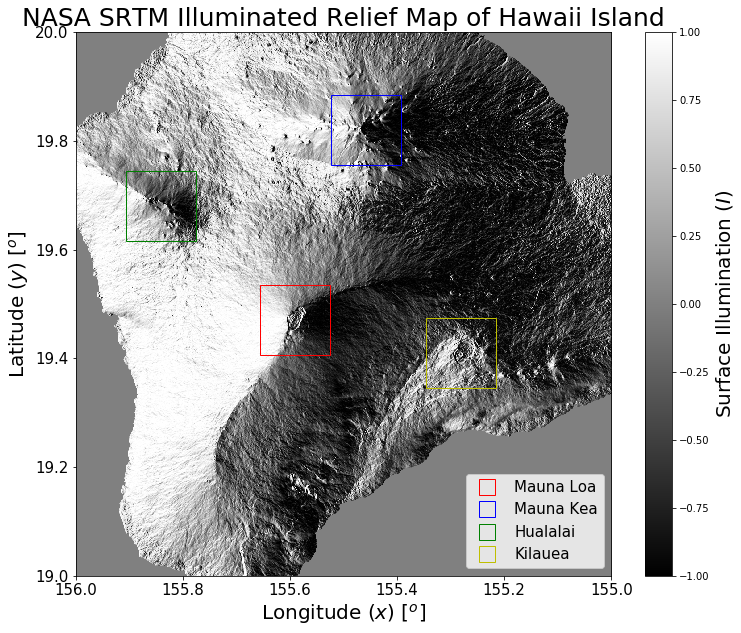

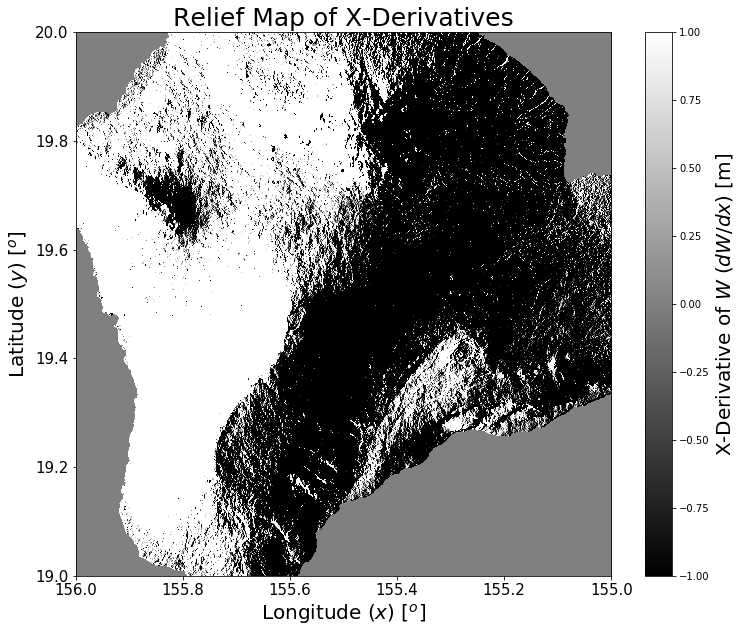

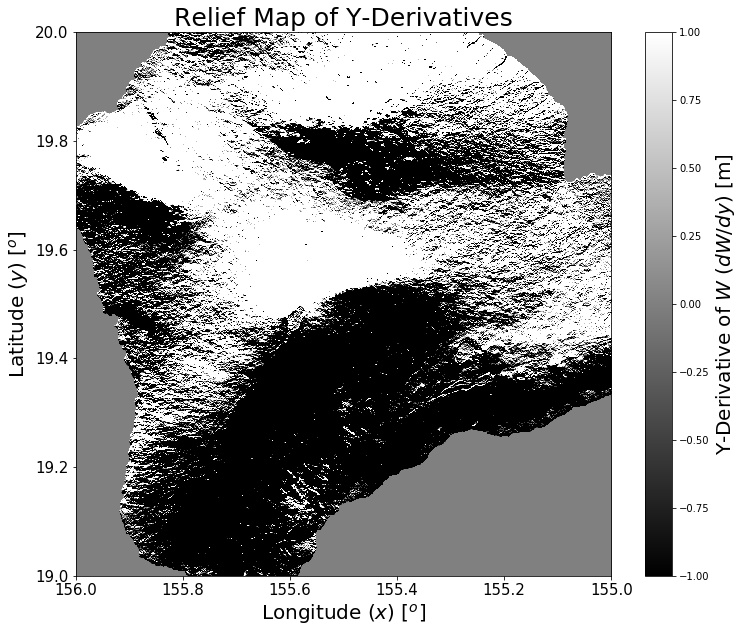

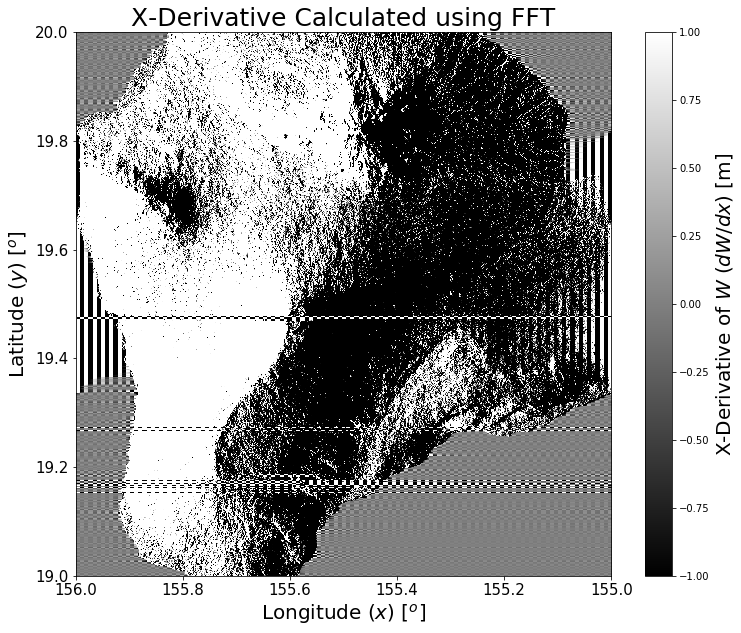

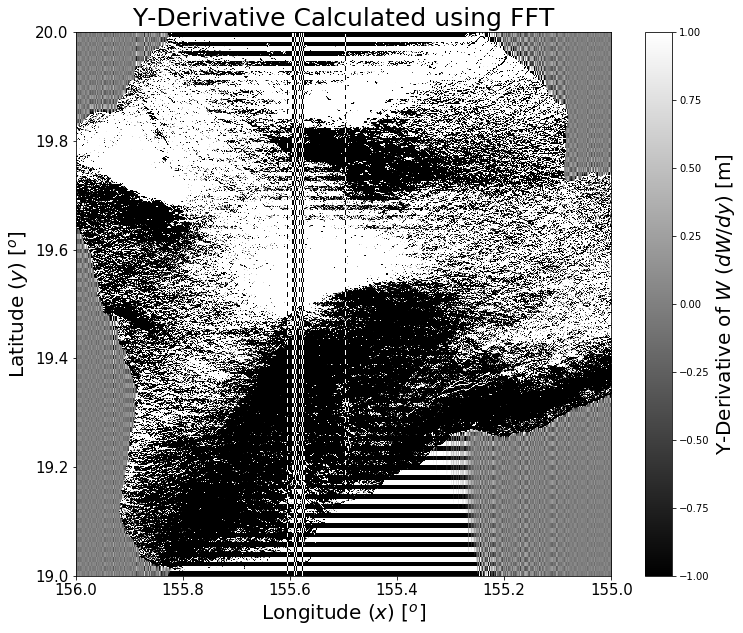

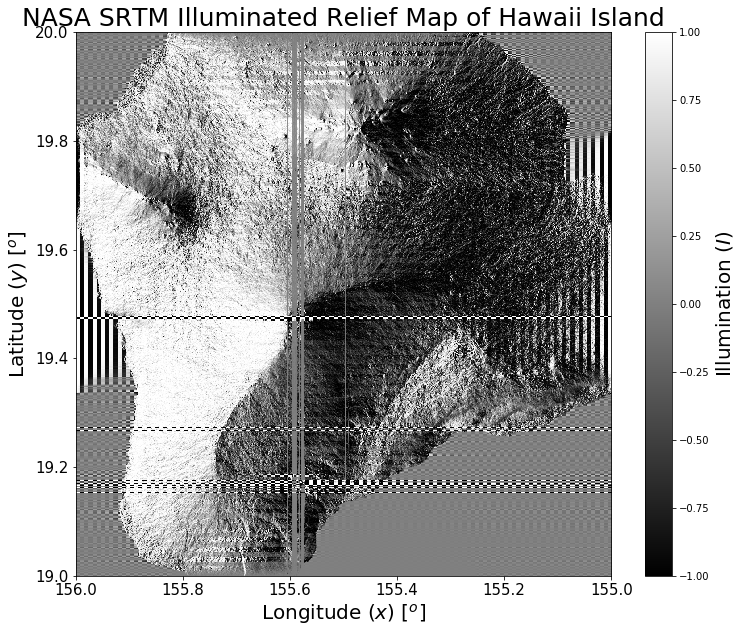

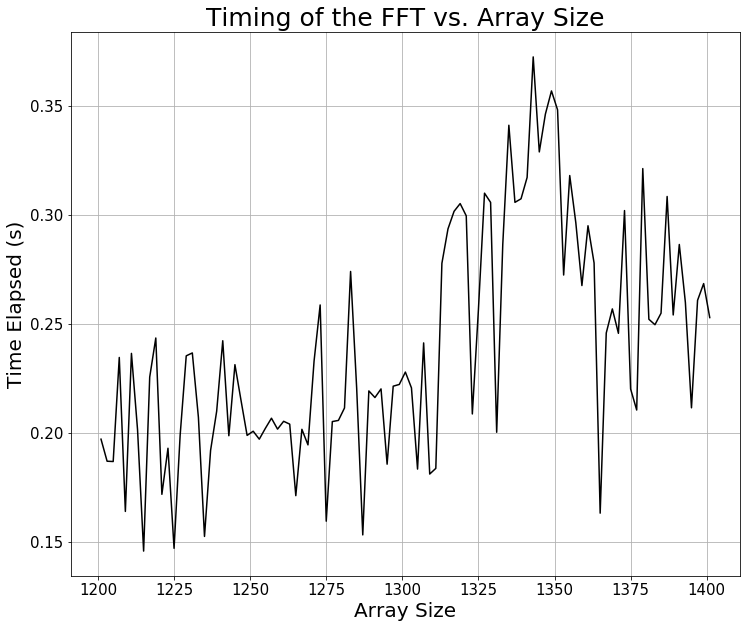

The maximum amount of time elapsed occurs for an array of size  [1343.] .
The minimum amount of time elapsed occurs for an array of size  [1215.] .


In [7]:
#PROBLEM 3

#PART A
#Importing Lab 3 results as a .py file
import lab3_mapping as lab3

#PART B
#Plotting the gradients with a discrete method
plt.figure(figsize=(12,10))
plt.imshow(lab3.I, extent=[np.amax(lab3.long), np.amin(lab3.long), np.amin(lab3.lat), np.amax(lab3.lat)], vmin=-1, vmax=1, aspect='auto', cmap='gist_gray')
plt.plot(155.590, 19.470, 'rs', markersize=70, fillstyle='none', label='Mauna Loa')
plt.plot(155.458, 19.820, 'bs', markersize=70, fillstyle='none', label='Mauna Kea')
plt.plot(155.840, 19.680, 'gs', markersize=70, fillstyle='none', label='Hualalai')
plt.plot(155.280, 19.410, 'ys', markersize=70, fillstyle='none', label='Kilauea')
plt.title('NASA SRTM Illuminated Relief Map of Hawaii Island', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.22, loc='lower right', fontsize=15)
plt.colorbar().set_label('Surface Illumination ($I$)', rotation=90, size=20)
plt.savefig('lab5_q3_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting the x derivative in isolation
plt.figure(figsize=(12,10))
plt.imshow(lab3.dWdx, extent=[np.amax(lab3.long), np.amin(lab3.long), np.amin(lab3.lat), np.amax(lab3.lat)], vmin=-1, vmax=1, aspect='auto', cmap='gist_gray')
plt.title('Relief Map of X-Derivatives', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar().set_label('X-Derivative of $W$ ($dW/dx$) [m]', rotation=90, size=20)
plt.savefig('lab5_q3_plot2.pdf', bbox_inches='tight')
plt.show()

#Plotting the y derivative in isolation
plt.figure(figsize=(12,10))
plt.imshow(lab3.dWdy, extent=[np.amax(lab3.long), np.amin(lab3.long), np.amin(lab3.lat), np.amax(lab3.lat)], vmin=-1, vmax=1, aspect='auto', cmap='gist_gray')
plt.title('Relief Map of Y-Derivatives', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar().set_label('Y-Derivative of $W$ ($dW/dy$) [m]', rotation=90, size=20)
plt.savefig('lab5_q3_plot3.pdf', bbox_inches='tight')
plt.show()

#PART C
#Define a function for calculating the gradient along the x-axis using FFT
def x_grad_func(data):
    k_coeff = np.fft.fftfreq(len(data)) #Defining a k coefficient based on the length of the data
    ft_data = np.fft.fft(data, axis=1)  #Taking the fft of the data along the x axis
    diff_coeff = 1j*2*np.pi*k_coeff     #Computing the differential coefficient
    ft_diff = ft_data*diff_coeff        #Row-by-row multiplication
    grad = np.fft.ifft(ft_diff, axis=1) #Computing the gradient along x with ifft
    return grad 

#Define a function for calculating the gradient along the y-axis using FFT
def y_grad_func(data):
    k_coeff = np.fft.fftfreq(len(data)) #Defining a k coefficient based on the length of the data
    ft_data = np.fft.fft(data, axis=0)  #Taking the fft of the data along the y axis
    diff_coeff = 1j*2*np.pi*k_coeff     #Computing the differential coefficient
    ft_diff = np.multiply(ft_data, diff_coeff[:, np.newaxis]) #Column-by-column multiplication
    grad = np.fft.ifft(ft_diff, axis=0) #Computing the gradient along y with ifft
    return grad 

#Calculate the x and y derivatives of the Hawaii data
x_grad = x_grad_func(lab3.W)
y_grad = y_grad_func(lab3.W)

#Plot the x derivatives in isolation
plt.figure(figsize=(12,10))
plt.imshow(x_grad.real, extent=[np.amax(lab3.long), np.amin(lab3.long), np.amin(lab3.lat), np.amax(lab3.lat)], vmin=-1, vmax=1, aspect='auto', cmap='gist_gray')
plt.title('X-Derivative Calculated using FFT', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar().set_label('X-Derivative of $W$ ($dW/dx$) [m]', rotation=90, size=20)
plt.savefig('lab5_q3_plot4.pdf', bbox_inches='tight')
plt.show()

#Plot the y derivatives in isolation
plt.figure(figsize=(12,10))
plt.imshow(y_grad.real, extent=[np.amax(lab3.long), np.amin(lab3.long), np.amin(lab3.lat), np.amax(lab3.lat)], vmin=-1, vmax=1, aspect='auto', cmap='gist_gray')
plt.title('Y-Derivative Calculated using FFT', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar().set_label('Y-Derivative of $W$ ($dW/dy$) [m]', rotation=90, size=20)
plt.savefig('lab5_q3_plot5.pdf', bbox_inches='tight')
plt.show()

#Check these plots by calculating illumination
phi = np.pi
I = -((np.cos(phi)*x_grad.real) + (np.sin(phi)*y_grad.real))/(((x_grad.real**2) + (y_grad.real**2) + 1)**(1/2))

#Plotting illumination
plt.figure(figsize=(12,10))
plt.imshow(I, extent=[np.amax(lab3.long), np.amin(lab3.long), np.amin(lab3.lat), np.amax(lab3.lat)], vmin=-1, vmax=1, aspect='auto', cmap='gist_gray')
plt.title('NASA SRTM Illuminated Relief Map of Hawaii Island', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar().set_label('Illumination ($I$)', rotation=90, size=20)
plt.savefig('lab5_q3_plot6.pdf', bbox_inches='tight')
plt.show()

#PART D
#Create an array of pad sizes
pads = np.arange(0,101)

#Create empty arrays for timing and array size
start = np.zeros(len(pads))
end = np.zeros(len(pads))
times = np.zeros(len(pads))
array_size = np.zeros(len(pads))

#Pad arrays, calculate the gradients, and time these calculations
for i in pads:
    start[i] = time()
    padded_arrays = np.pad(lab3.W, (pads[i], pads[i]), 'constant', constant_values=(0,0))
    array_size[i] = padded_arrays[i].size
    x_gradients = x_grad_func(padded_arrays)
    y_gradients = y_grad_func(padded_arrays)
    end[i] = time()
    times[i] = end[i] - start[i]
    
#Plot timing against total array size
plt.figure(figsize=(12,10))
plt.plot(array_size, times, color='k')
plt.title('Timing of the FFT vs. Array Size', fontsize=25)
plt.ylabel('Time Elapsed (s)', fontsize=20)
plt.xlabel('Array Size', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab5_q3_plot7.pdf', bbox_inches='tight')
plt.show()

#Determine the reason for timing variations
max_time = np.max(times)
max_index = np.where(times == max_time)
max_size = array_size[max_index]
print('The maximum amount of time elapsed occurs for an array of size ', max_size, ".")

min_time = np.min(times)
min_index = np.where(times == min_time)
min_size = array_size[min_index]
print('The minimum amount of time elapsed occurs for an array of size ', min_size, ".")